(549, 798)


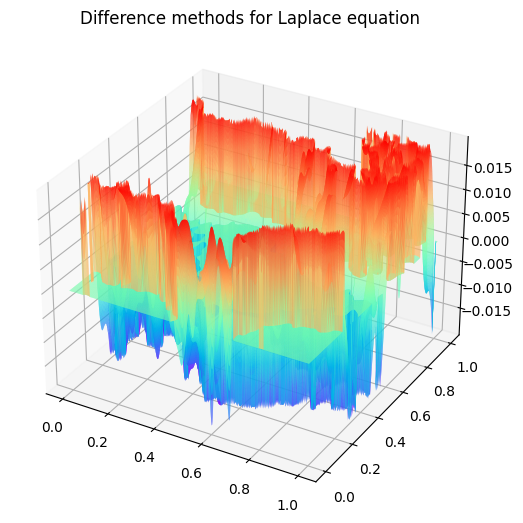

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mag = np.loadtxt("mag.txt")
mag_sht = np.mean(mag)
mag = mag-mag_sht
# angle = np.loadtxt("../pic/0.00/0/angle.txt")
mag[np.where(mag>=0.02)]=0
mag[np.where(mag<=-0.02)]=0

print(mag.shape)
y = np.linspace(0,1,mag.shape[0])
x = np.linspace(0,1,mag.shape[1])
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)        # 高版本需要加入这一句py3.8以上
ax.plot_surface(X,Y,mag,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
# ax.plot_surface(X,Y,Phi)
# ax.contourf(X,Y,Phi,zdir='z',offset=1,cmap='rainbow')
plt.title('Difference methods for Laplace equation',fontsize='12')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 求偏移梯度的导数
mag = np.loadtxt("mag.txt")
angle = np.loadtxt("angle.txt")

def derivate_displacement(mag, angle):
    # 采用一阶向后差分的方式计算背景点偏移量的导数
    derivatives = np.zeros([mag.shape[0], mag.shape[1], 2])
    horMat = np.multiply(mag, np.cos(angle))
    verMat = np.multiply(mag, np.sin(angle))

    for i in np.arange(mag.shape[0]-1):
        for j in np.arange(mag.shape[1]-1):
            derivatives[i][j][0] = verMat[i][j]-verMat[i+1][j]
            derivatives[i][j][1] = horMat[i][j]-horMat[i][j+1]

    g_max = derivatives[0] + derivatives[1]
    return g_max

g_max = derivate_displacement(mag, angle)



In [2]:
n0=2.234033
# H为透镜厚度、W为镜子到背景距离
H=6.71 # mm
W=7100 # mm
k=2*n0/(2*W+H)/H
proportion = 400/1944 # mm/pixs
g_max *= k*proportion

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = np.min(mag.shape[0], mag.shape[1])
# N=700 # 矩阵维数
Imat = -np.eye(N)/4

def Gmatrix(N): # 生成G矩阵
    mtr = np.eye(N)
    for i in range(0, N - 1):
        mtr[i][i + 1] = -1 / 4
    for i in range(1, N):
        mtr[i][i - 1] = -1 / 4
    return mtr

def zero_mat(N,m): # 生成m个横向连接N阶零矩阵,m>=1
    zero_matrix = np.zeros((N,N))
    for i in range(m-1):
        zero_matrix = np.block([zero_matrix,np.zeros((N,N))])
    return zero_matrix

def zero_arr(N, m):  # 生成m个纵向连接N阶列向量,m>=1
    zero_array = np.zeros((N,1))
    for i in range(m-1):
        zero_array = np.block([[zero_array],[np.zeros((N,1))]])
    return zero_array

def Kmatrix(N,Gmat,Imat):
    Kmar_list = []
    for i in range(N):
        if i == 0:
            Kmat_line = np.block([np.block([Gmat, Imat]),zero_mat(N,N-2)])
            Kmar_list.append(Kmat_line)
        elif i == 1:
            Kmat_line = np.block([Imat, Kmar_list[-1][:,:-N]])
            Kmar_list.append(Kmat_line)
        else:
            Kmat_line = np.block([np.zeros((N,N)), Kmar_list[-1][:,:-N]])
            Kmar_list.append(Kmat_line)
    Kmat = Kmar_list[0]
    for j in range(N-1):
        Kmat = np.block([[Kmat],[Kmar_list[j+1]]])
    return Kmat

def Barray(N): # 方程右边
    barr = np.ones((N,1))/4
    barr = np.block([[barr],[zero_arr(N,N-2)]])
    barr = np.block([[barr],[np.ones((N,1))/4]])
    return barr

Gmat = Gmatrix(N)
Kmat = Kmatrix(N,Gmat,Imat)
# Barr = Barray(N)
# print(Barr.shape)
# Phi = np.linalg.solve(Kmat,Barr)
Phi = np.linalg.solve(Kmat, C)

def trans(N,Phi):
    # 把线性方程组解得的列矢量分割，从左到右排列转化为方矩阵，方便可视化
    phi = Phi[0:N]
    for i in range(N-1):
        j = i+1
        phi = np.block([phi,Phi[(j*N):((j+1)*N)]])
    return phi

Phi = trans(N,Phi)



AxisError: axis 798 is out of bounds for array of dimension 0

In [4]:
N = np.min([g_max.shape[0], g_max.shape[1]])
print(N)

2


d:\Users\lenovo\Anaconda3\envs\school\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


NameError: name 'Phi' is not defined

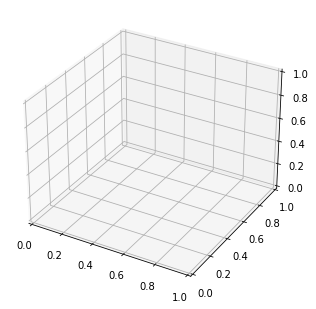

In [5]:
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Phi,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
# ax.plot_surface(X,Y,Phi)
# ax.contourf(X,Y,Phi,zdir='z',offset=1,cmap='rainbow')
plt.title('Difference methods for Laplace equation',fontsize='12')
plt.show()

In [4]:
phi = np.savetxt("phi.txt", Phi)

d:\Users\lenovo\Anaconda3\envs\school\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  del sys.path[0]


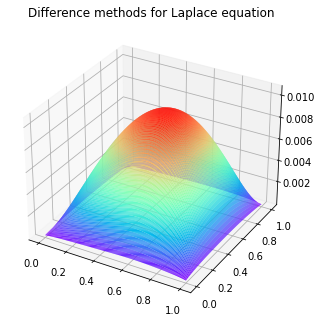

0.010634772267402455


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

phi1 = np.loadtxt("../pic/0.04/0/phi.txt")
phi2 = np.loadtxt("../pic/0.04/1/phi.txt")
N = 150
phic = np.abs(phi2 - phi1)
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,phic,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))
# ax.plot_surface(X,Y,Phi)
# ax.contourf(X,Y,Phi,zdir='z',offset=1,cmap='rainbow')
plt.title('Difference methods for Laplace equation',fontsize='12')
plt.show()
print(np.max(phic))